**Group 7**

group: project-009-7

ilin27

GitHub Link: https://github.com/ilin27/project_planning_stage_individual.git 
-

In [13]:
# Loading datasets into R
library(tidyverse)

url_players = "https://raw.githubusercontent.com/ilin27/project_planning_stage_individual/refs/heads/main/players.csv"
download.file(url_players, "players.csv")
players <- read_csv("players.csv")

url_sessions <- "https://raw.githubusercontent.com/ilin27/project_planning_stage_individual/refs/heads/main/sessions.csv"
download.file(url_sessions, destfile = "sessions.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [15]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

**(1) Data Description:**
-

players.csv
=
- **Number of observations**: 196
- **Summary statistics (2 d.p.)**: Please refer to the tables displayed by summary(players) above. Some interesting ones to note:
    - Many more players subscribed (144) than not (52)
    - The mean hours played is about 5.8 hours
    - The average age of a player is 21 years old
- **Number of variables**: 7
    - experience <chr> The experience level of the player (Amateur, Regular, Pro, Veteran)
    - subscribe <lgl> Whether players have subscribed to the newsletter (TRUE, FALSE)
    - hashedEmail <chr>	The player's email, hashed for privacy
    - played_hours <dbl> The number of hours the player has spent on the server
    - name <chr> The player's name
    - gender <chr> The gender of the player (Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say)
    - Age <dbl> (The "A" is capitalized) The players age
- **Any issues in the data**: Since many more players have subscribed than not (higher percentage of TRUE), this may be an imbalance, affecting classification (something to keep in mind).
- **How the data was collected**: Dr. Frank Wood collected data on player actions as they navigate in his MineCraft server.

sessions.csv
=
- **Number of observations**: 1535
- **Summary statistics (2 d.p.)**: Please refer to the tables displayed by summary(sessions) above. Some interesting ones to note:
    - Since start_time and end_time are chr and not dbl, we cannot see useful summary information (e.g. average start time)
- **Number of variables**: 5
    - hashedEmail <chr> The player's email, hashed for privacy
    - start_time <chr> The start date and start time (format: DD/MM/YYYY HH:MM)
    - end_time <chr> The end date and end time (format: DD/MM/YYYY HH:MM)
    - original_start_time <dbl> The original start time (unix standard time) - meaningless in the context of the proposed question
    - original_end_time <dbl> The original end time (unix standard time) - meaningless in the context of the proposed question
- **Any issues in the data**: The start_time and end_time columns are not tidy, since there are two values (data and time) in each cell.
- **How the data was collected**: Dr. Frank Wood collected data on player login and logout times on his MineCraft server.

**(2) Questions:**
-

I will be exploring Question 1: **"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**

Specific question: **"Can the number of hours played (played_hours) and the age of the player (Age) predict if a player will subscribe (subscribe) to a game-related newletter in the players.csv dataset?"**

The rationale for choosing the predictor played_hours is that a greater number of hours played may indicate that the player has an interest in the game, and would subscribe to the newsletter. The reasoning for choosing Age is because an older player may be more interested in reading a newsletter. Of course, these are just assumptions and we would need to explore these possibilities through visualization and modelling.

I will be focusing on the players.csv dataset, and will not be using the sessions.csv dataset since it does not contain any data relevant to the above stated question.

**(3) Exploratory Data Analysis and Visualization**
-

In [16]:
# Loading datasets into R
library(tidyverse)
url_players = "https://raw.githubusercontent.com/ilin27/project_planning_stage_individual/refs/heads/main/players.csv"
download.file(url_players, "players.csv")
players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
## Wrangling

The players.csv dataset is a tidy dataset. 
- Each row is a singular observation and each column is singular variable.
- Each cell contains a single value.

Therefore, there is no need for minimum necessary wrangling to be done at this point of the project.

In [18]:
# Compute the mean value for each quantitative variable in the players.csv data set. 
# https://www.codecademy.com/resources/docs/markdown/tables

summarize(players,
          mean_played_hours = mean(played_hours, na.rm = TRUE),
          mean_Age = mean(Age, na.rm = TRUE))

summarize(sessions,
          mean_original_start_time = mean(original_start_time, na.rm = TRUE),
          mean_original_end_time = mean(original_end_time, na.rm = TRUE))

mean_played_hours,mean_Age
<dbl>,<dbl>
5.845918,21.13918


mean_original_start_time,mean_original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


### Table 1: Mean Quantitative Variables in players.csv

| mean_played_hours    | mean_Age |
| -------------------- | -------- |
| 5.846                | 21       |

### Table 2: Mean Quantitative Variables in sessions.csv

| mean_original_start_time | mean_original_end_time |
| ------------------------ | ---------------------- |
| 1.72e+12                 | 1.72e+12               |

**Graphs**
-

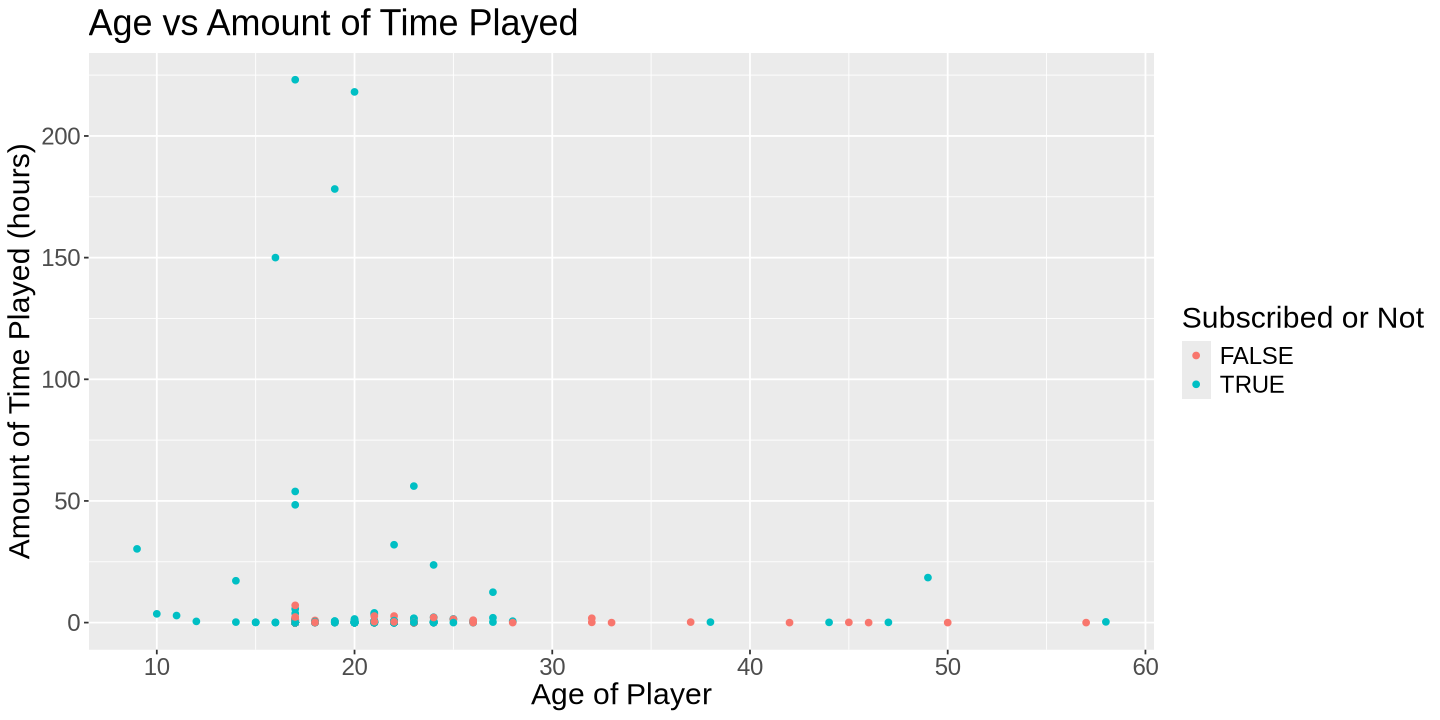

In [19]:
# Graph 1: Age vs Hours Played

options(repr.plot.width = 12, repr.plot.height = 6)
players_scatter_plot <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) + 
    geom_point(na.rm = TRUE) + 
    labs(x = "Age of Player",
         y = "Amount of Time Played (hours)",
         color = "Subscribed or Not",
         title = "Age vs Amount of Time Played") +
    theme(text = element_text(size = 18))
players_scatter_plot

### Graph 1 insights:

- The age of the players range from around 9-58 years old; most players are in the 15-25 year range.
- There seems to be no relationship between the age of the player and whether or not they subscribe to the newsletter.
- There seems to be a relationship between the hours played and whether a player subscribes or not. All the players that have not subscribed have spent little time playing the game. However, there are many players that *did* subscribe that also spent little time playing.
- Most of the players have spent little time (less than roughly 10 hours) playing on the server.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


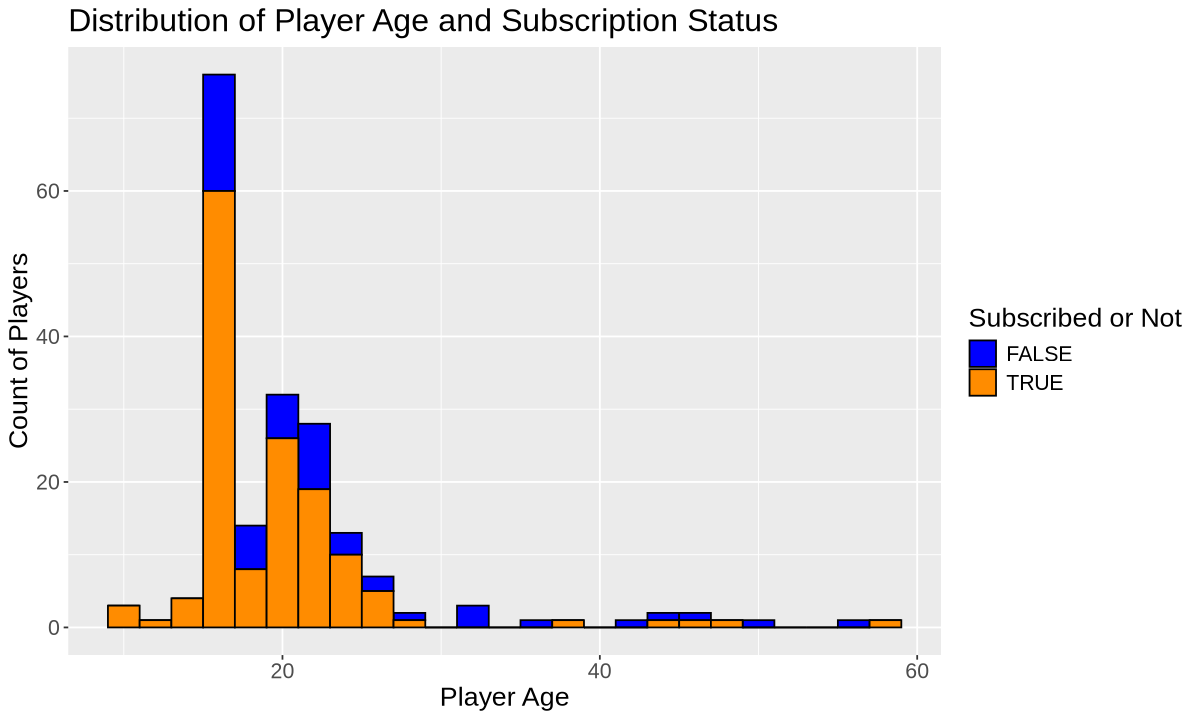

In [20]:
# Graph 2: Distribution of Player Age and Subscription Proportions

options(repr.plot.width = 10, repr.plot.height = 6)

players_hist <- ggplot(players, aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 2, color = "black") + 
    labs(x = "Player Age", 
         y = "Count of Players", 
         fill = "Subscribed or Not", 
         title = "Distribution of Player Age and Subscription Status") +
    scale_fill_manual(values = c("blue", "darkorange")) +
    theme(text = element_text(size = 16))

players_hist 

### Graph 2 insights:

- We can see that a majority of players in the 15-25 range have subscribed to the newsletter.
- On the other hand, it seems that a majority of the players about 30 years of age opted not to subscribe. This observation is weaker, however, since there are significantly fewer players in this age range.

**(4) Methods and Plan**
-

Why is this method appropriate?
- Method: K-NN classification.
- K-NN classification works well for classification problems (in this case, does the player subscribe or not)?
    - The variable subscribe will be used as a categorical variable.

Which assumptions are required, if any, to apply the method selected?
- None for K-NN classification.

What are the potential limitations or weaknesses of the method selected?
- Since there is a greater number of people that subscribed than not, that may create an imbalance for K-NN classification.
- K-NN classification is slow for large datasets.
    - Fortunately, players.csv is a relatively small dataset that we will work with.

How are you going to compare and select the model?
- To choose the parameter K, I will use cross-validation (5-fold), create a workflow, and collect metrics.
- I will then create a list of K-values to pass through tune_grid, and plotting the accuracy vs the number of K neighbors. I would likely choose the K with the highest accuracy estimate.

How are you going to process the data to apply the model?
- I will be splitting the data by using the initial_split, training, and testing functions.
- 70% of the original data will be used for the training set (prop = 0.7), and the 30% remaining will be used for the testing set (validation set).
- I will split the data using 5-fold cross-validation, via the vfold_cv function. One chunk of the dataset will be used as the validation set, while the remaining chunks (C-1) will be used as the training data.